In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
house_data = pd.read_csv("housing.csv")

In [ ]:
house_data.dropna(inplace=True)

In [ ]:
house_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Train test split

In [ ]:
x =  house_data.drop(['median_house_value','ocean_proximity'],axis=1)    # Feature (dropping ocean_proximity because it it a categorical column and scaling only performed on numerical data we later convert this column in numerical using encodeing)
y = house_data['median_house_value']                                     # target

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# Standard Scaler

In [ ]:
scaler = StandardScaler()

scaler.fit(x_train)                        # fitt scaler to x_train

x_train_scaled = scaler.transform(x_train)         # transform train and test sets
x_test_scaled = scaler.transform(x_test)

In [ ]:
scaler.mean_

array([-119.56280803,   35.62597577,   28.66499449, 2635.96531261,
        537.9946776 , 1425.48935519,  499.70396427,    3.86631999])

In [ ]:
# scaler return array so we convert it to a dataframe
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x.columns)

# Effect of scaling

Text(0.5, 1.0, 'after scaling')

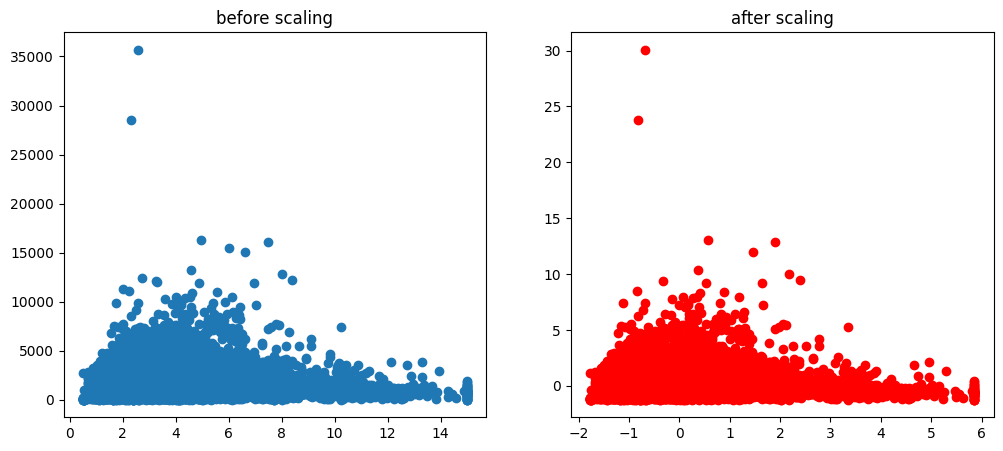

In [ ]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))


ax1.scatter(house_data['median_income'],house_data['population'])
ax1.set_title("before scaling")
ax2.scatter(x_train_scaled['median_income'],x_train_scaled['population'],color='red')
ax2.set_title("after scaling")

the scale in the upper visual has changed but the data sperate is not effected

<Axes: title={'center': 'after scaling'}, xlabel='median_income', ylabel='Density'>

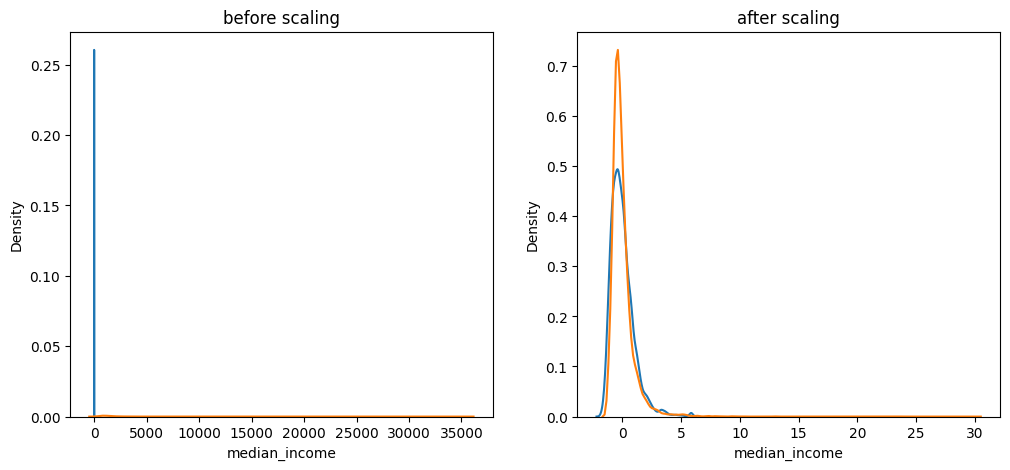

In [ ]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("before scaling")
sns.kdeplot(house_data['median_income'],ax=ax1)
sns.kdeplot(house_data['population'],ax=ax1)

ax2.set_title("after scaling")
sns.kdeplot(x_train_scaled['median_income'],ax=ax2)
sns.kdeplot(x_train_scaled['population'],ax=ax2)

in the upper visual we can see that before scaling the values are uncompareable but after scaling we can compare these values

# why feature scaling is important

There is no effect of scaling on linearregression algorithm it effects on logistics regression
It is depand on algorithm which we are using that the algorithm affected by scaling or not

In [ ]:
lr = LinearRegression()
lr_scaled = LinearRegression()

In [ ]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [ ]:
accuracy = r2_score(y_test,y_pred)
accuracy_scaled = r2_score(y_test,y_pred_scaled)


In [ ]:
accuracy

0.6414568274158088

In [ ]:
accuracy_scaled

0.6414568274158047

# **NORMALIZATION**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label','Alcohol','Malic acid']

<Axes: xlabel='Class label', ylabel='Density'>

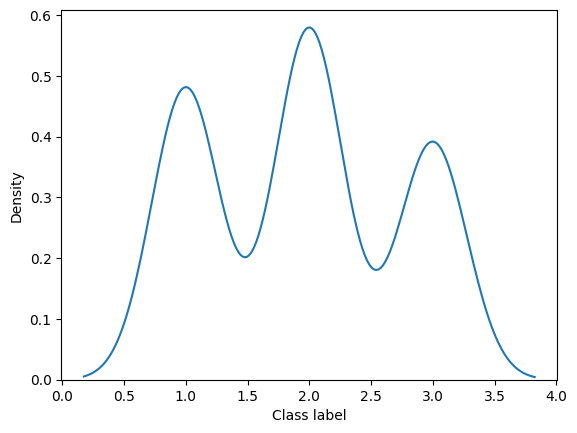

In [ ]:
sns.kdeplot(df['Class label'])

<Axes: xlabel='Alcohol', ylabel='Density'>

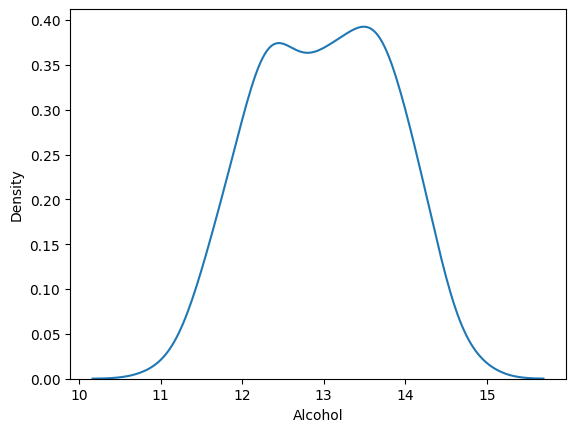

In [ ]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

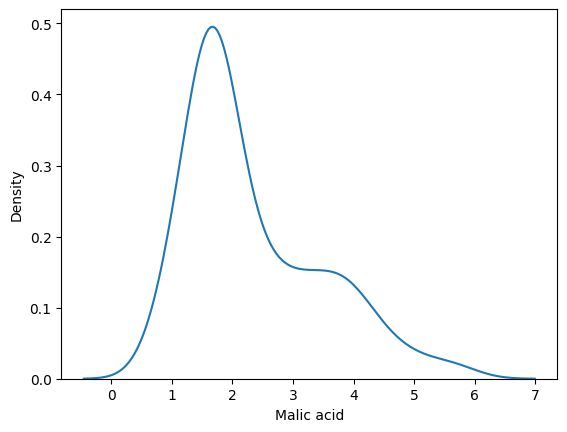

In [ ]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

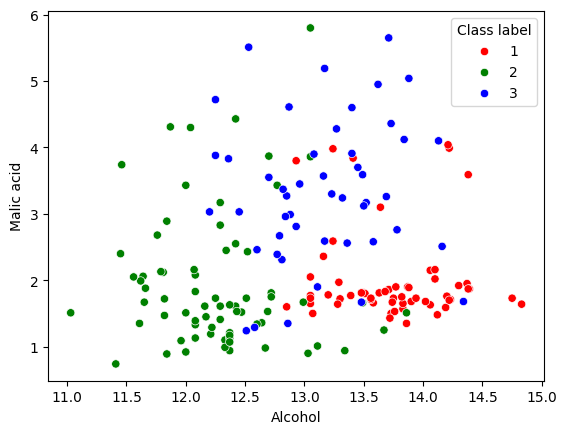

In [ ]:
color={1:'red',2:'green',3:'blue'}
sns.scatterplot(x='Alcohol',y='Malic acid',hue=df['Class label'],data=df,palette=color)

In [ ]:
x = df.drop('Class label',axis=1)
y = df['Class label']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(x_train)

MinMaxScaler()

In [ ]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)

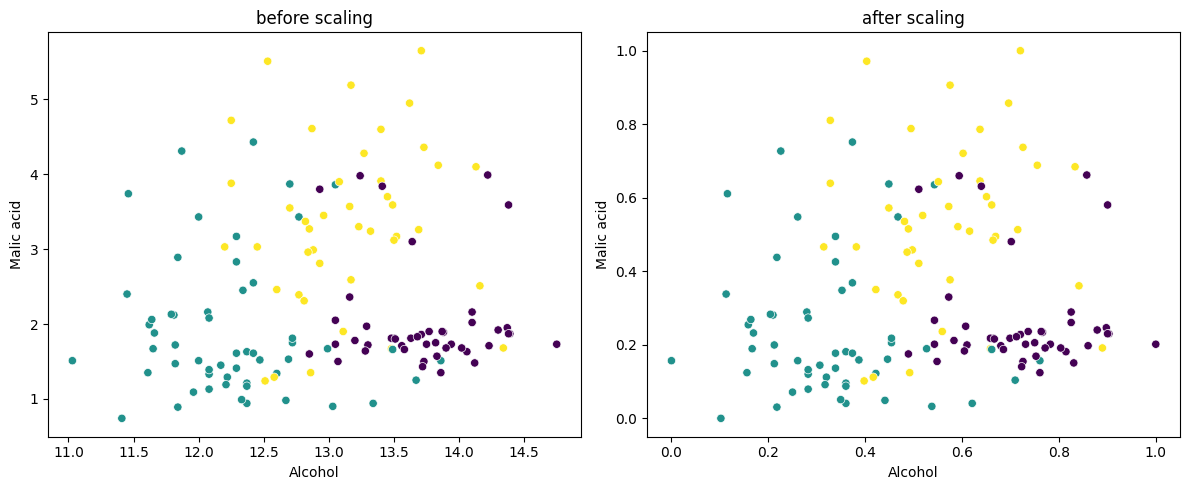

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x=x_train['Alcohol'],y=x_train['Malic acid'],c=y_train)
plt.title('before scaling')

plt.subplot(1,2,2)
sns.scatterplot(x=x_train_scaled['Alcohol'],y=x_train_scaled['Malic acid'],c=y_train)
plt.title('after scaling')

plt.tight_layout()

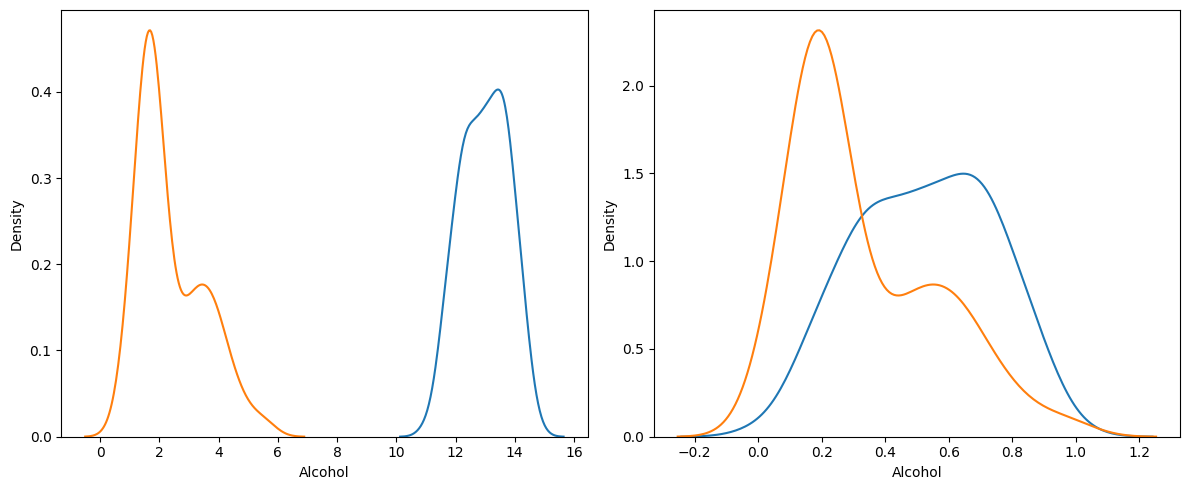

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.kdeplot(x_train['Alcohol'])
sns.kdeplot(x_train['Malic acid'])

plt.subplot(1,2,2)
sns.kdeplot(x_train_scaled['Alcohol'])
sns.kdeplot(x_train_scaled['Malic acid'])

plt.tight_layout()